In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("data/placement.csv")

In [5]:
df.head(4)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1


In [6]:
df.shape

(1000, 3)

In [7]:
df.sample(5)

,cgpa,placement_exam_marks,placed
820,6.27,16.0,0
14,7.91,43.0,0
849,7.89,8.0,1
824,7.48,27.0,1
657,7.60,23.0,0


C:\Users\aryal\AppData\Local\Temp\ipykernel_11160\4015578656.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\aryal\AppData\Local\Temp\ipykernel_11160\4015578656.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


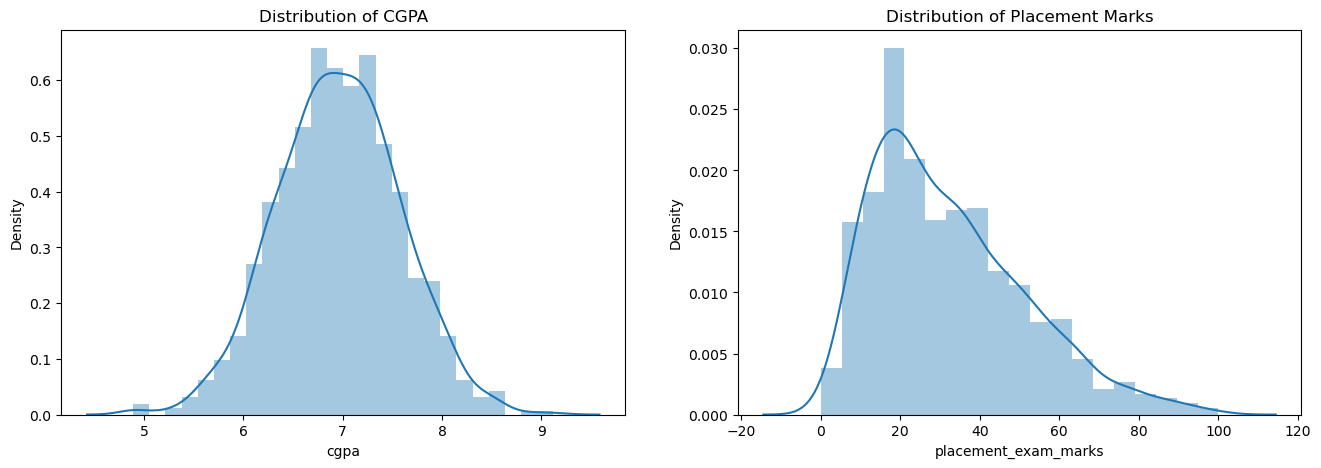

In [12]:


# Set the figure size
plt.figure(figsize=(16, 5))

# First subplot for 'cgpa'
plt.subplot(1, 2, 1)
sns.distplot(df['cgpa'])
plt.title('Distribution of CGPA')

# Second subplot for 'placement_marks'
plt.subplot(1, 2, 2)
sns.distplot(df['placement_exam_marks'])
plt.title('Distribution of Placement Marks')

# Display the plots
plt.show()


In [14]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

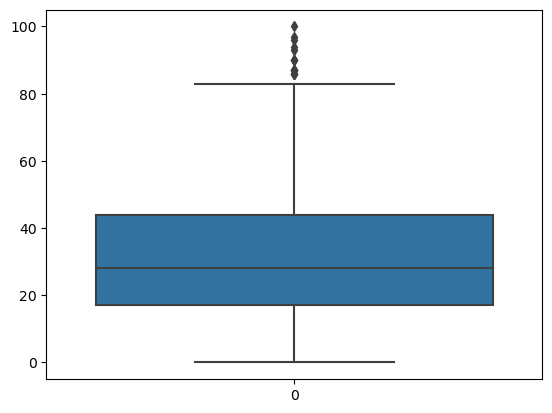

In [15]:
sns.boxplot(df['placement_exam_marks'])

In [16]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [17]:
iqr=percentile75-percentile25

In [18]:
iqr

27.0

In [21]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr


In [22]:
print(upper_limit)
print(lower_limit)

84.5
-23.5


In [23]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [24]:
df[df['placement_exam_marks']>upper_limit].shape

(15, 3)

In [26]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [27]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [28]:
new_df.shape

(985, 3)

C:\Users\aryal\AppData\Local\Temp\ipykernel_11160\298863417.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([df['placement_exam_marks']])
C:\Users\aryal\AppData\Local\Temp\ipykernel_11160\298863417.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


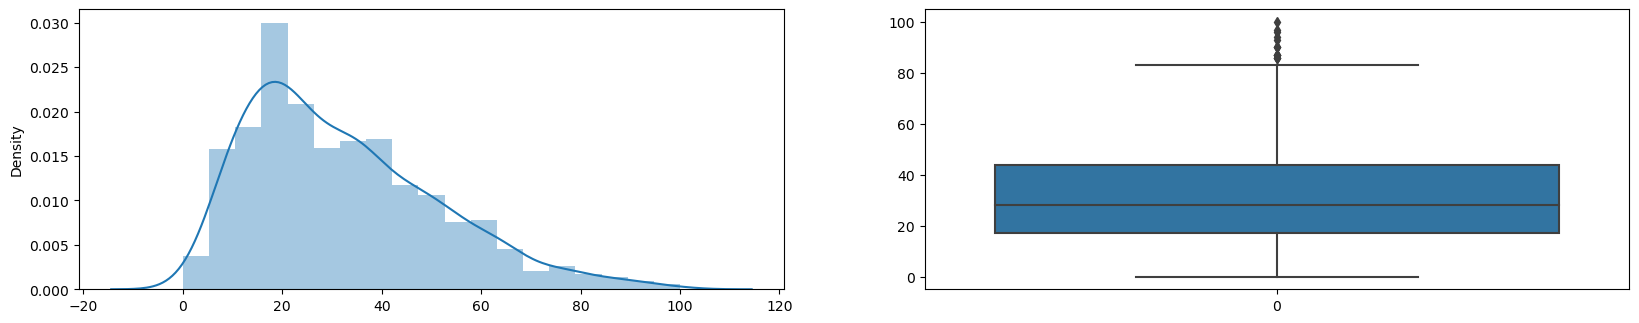

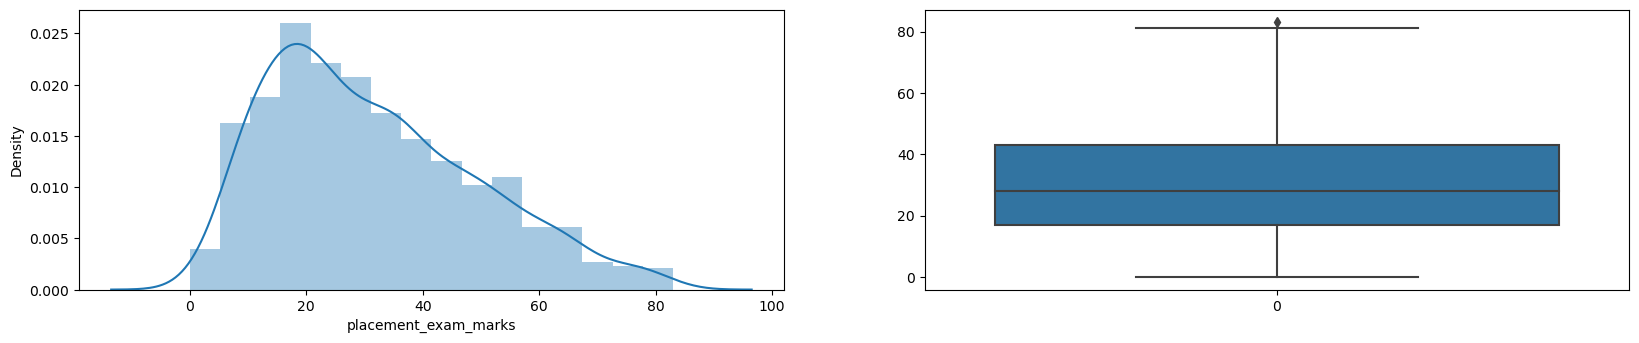

In [33]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.distplot([df['placement_exam_marks']])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()


C:\Users\aryal\AppData\Local\Temp\ipykernel_11160\3763602662.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


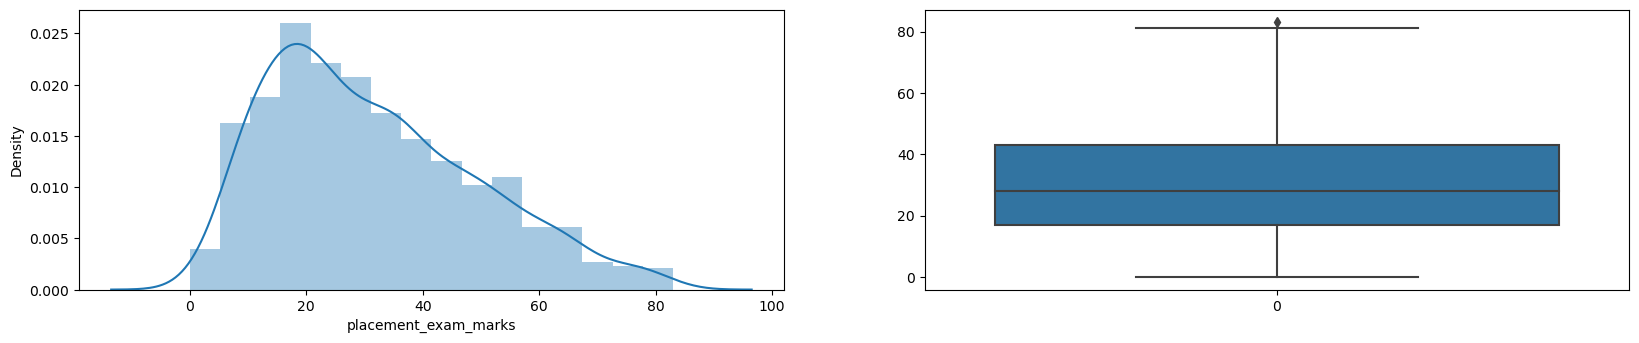

In [35]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit, upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit, lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [36]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\aryal\AppData\Local\Temp\ipykernel_11160\1058905166.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([df['placement_exam_marks']])
C:\Users\aryal\AppData\Local\Temp\ipykernel_11160\1058905166.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


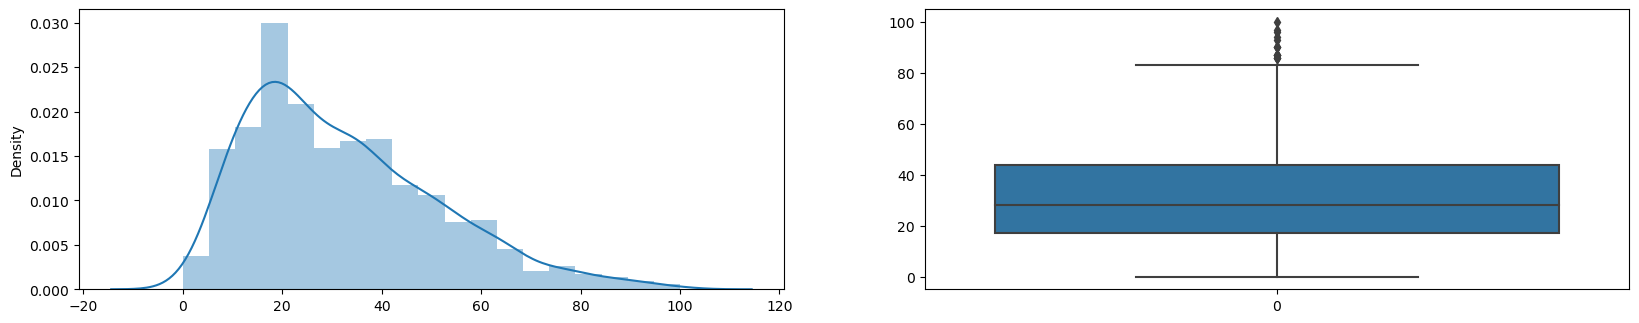

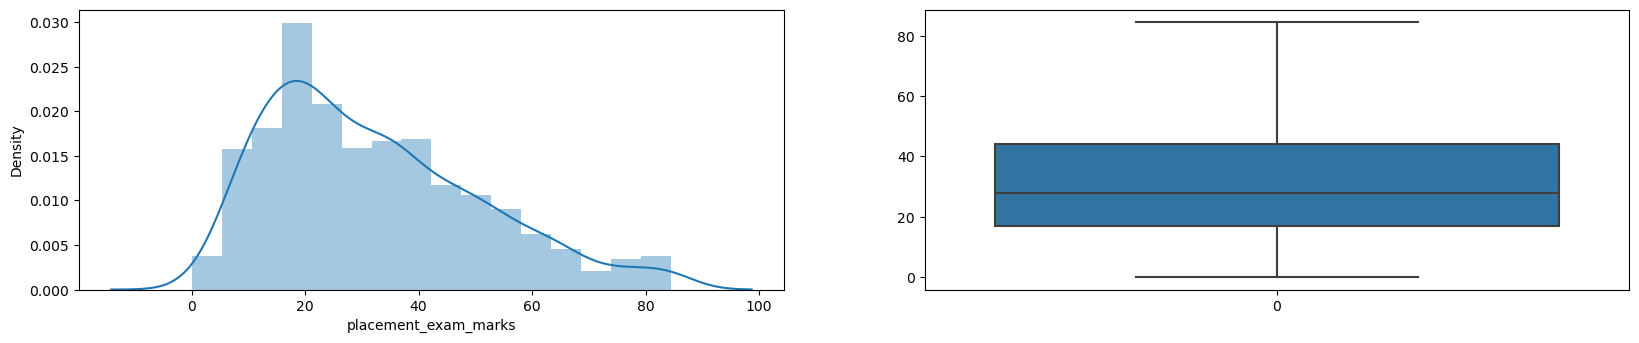

In [37]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.distplot([df['placement_exam_marks']])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()